In [1]:
import pandas as pd
import numpy as np

In [119]:
DF = pd.read_csv('../../datasets/soccer.csv', date_parser=True)
DF['date'] = pd.to_datetime(DF['date'])
DF.sort_values('date', inplace=True)
DF.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [120]:
DF['date'].describe(datetime_is_numeric=True)

count                            41640
mean     1991-01-01 07:12:45.648414848
min                1872-11-30 00:00:00
25%                1978-03-08 00:00:00
50%                1997-09-10 00:00:00
75%                2009-05-10 00:00:00
max                2020-09-08 00:00:00
Name: date, dtype: object

In [75]:
diff = DF['date'].max() - DF['date'].min()
diff.days 

1287

In [121]:
DF['month'] = DF['date'].dt.month
DF

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3
...,...,...,...,...,...,...,...,...,...,...
41633,2020-09-08,France,Croatia,4,2,UEFA Nations League,Paris,France,False,9
41632,2020-09-08,Denmark,England,0,0,UEFA Nations League,Copenhagen,Denmark,False,9
41631,2020-09-08,Belgium,Iceland,5,1,UEFA Nations League,Brussels,Belgium,False,9
41634,2020-09-08,Sweden,Portugal,0,2,UEFA Nations League,Stockholm,Sweden,False,9


<AxesSubplot:xlabel='date,tournament'>

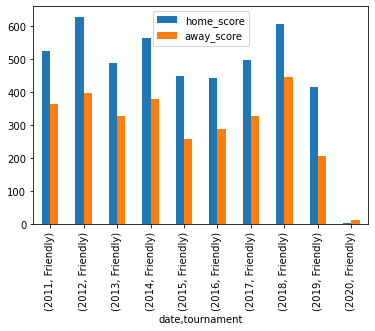

In [250]:
grouped = DF[DF['tournament']=='Friendly'].groupby([DF['date'].dt.year,'tournament']).sum()
grouped[['home_score','away_score']].tail(10).plot(kind='bar')

<AxesSubplot:xlabel='date'>

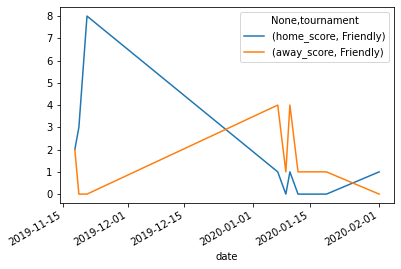

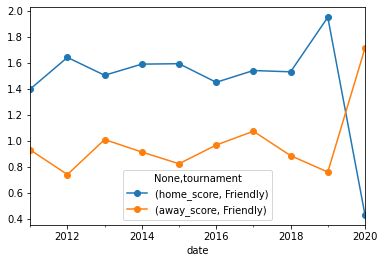

In [296]:
friendly = DF[DF['tournament']=='Friendly']
friendly_pvt = friendly.drop_duplicates('date').pivot(index='date',columns='tournament',values=['home_score','away_score'])

friendly_pvt.tail(10).plot()
friendly_pvt.resample('Y').mean().tail(10).plot(style='-o')

# friendly_pvt.index.year